# Importing Packages and Reading file as DataFrame

In [1]:
import numpy as np #import numpy
import pandas as pd #import pandas
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt #import pyplot
from scipy.stats import pearsonr #for pearson's correlation

from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler #for various scaling methods
from sklearn.linear_model import LogisticRegression #for LogisticRegression
from sklearn.naive_bayes import GaussianNB #for NaiveBayes
from sklearn.neighbors import KNeighborsClassifier #for KNN
from sklearn.svm import SVC #for Support vector classifier


from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  #for image
from sklearn import tree #for tree
from os import system #using user environment
from sklearn.ensemble import BaggingClassifier #for bagging classifier
from sklearn.ensemble import AdaBoostClassifier #for adaptive boosting
from sklearn.ensemble import GradientBoostingClassifier #for gradient boosting
from sklearn.ensemble import RandomForestClassifier #for random forest
from sklearn.preprocessing import LabelEncoder #for lebel encoder

from sklearn.tree import export_graphviz #for exporting dot data
from sklearn.externals.six import StringIO  #for stringIO
from IPython.display import Image  #for including image
import pydotplus #for dot data
import graphviz #for visualizing decision tree
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv("C:/Users/tgl146/Desktop/proj 3/bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Exploratory Data Analysis
## Shape of the data

In [5]:
df.shape

(45211, 17)

In [6]:
print('\033[1m''Number of rows in dataframe:    ',df.shape[0]) #for number of rows
print('\033[1m''Number of features in dataframe:    ',df.shape[1]) #for number of features

Number of rows in dataframe:     45211
Number of features in dataframe:     17


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [8]:
df.dtypes.to_frame("dtypes of category")

,dtypes of category
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [9]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [10]:
df.dtypes.to_frame("dtypes of category")

,dtypes of category
age,int64
job,category
marital,category
education,category
default,category
balance,int64
housing,category
loan,category
contact,category
day,int64


# Finding missing values

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [12]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [13]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [14]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [15]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [16]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [17]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [18]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [19]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [20]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [21]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# 5 point summary understanding:
* Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
* 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
* More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile
* Minimum balance is -8019 and maximum balance is 102127
* Minimum age is 18 years and maximum is 95 years

In [22]:
df.loc[df['pdays']==999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


# Distribution of numerical columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


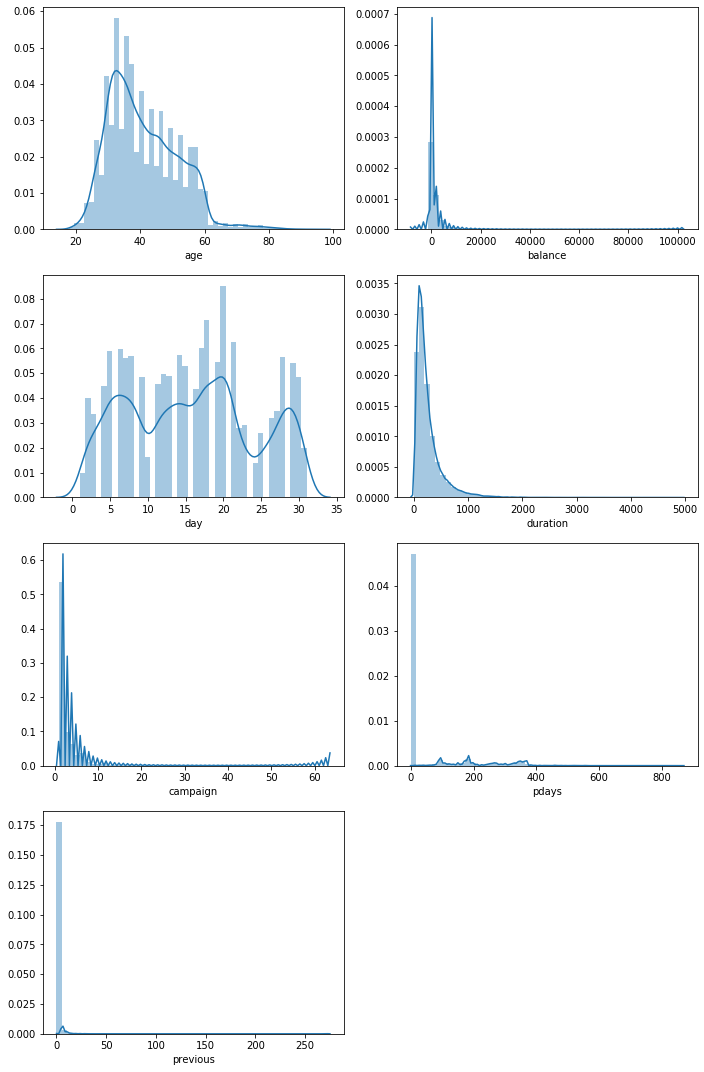

In [24]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() #to flatten subplot index positions
sns.distplot(df['age'],ax=axe[0]) #Distance plot of 'age'
sns.distplot(df['balance'],ax=axe[1]) #Distance plot of 'balance'
sns.distplot(df['day'],ax=axe[2]) #Distance plot of 'day'
sns.distplot(df['duration'],ax=axe[3]) #Distance plot of 'duration'
sns.distplot(df['campaign'],ax=axe[4]) #Distance plot of 'campaign'
sns.distplot(df['pdays'],ax=axe[5]) #Distance plot of 'pdays'
sns.distplot(df['previous'],ax=axe[6]) #Distance plot of 'previous'
fig.tight_layout() #for arranging the plots
fig.show() #display plots
#axe.flat[-1].set_visible(False)

# Understanding from distributions
'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
'age' is somewhat normally distributed

# Distribution of Categorical columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


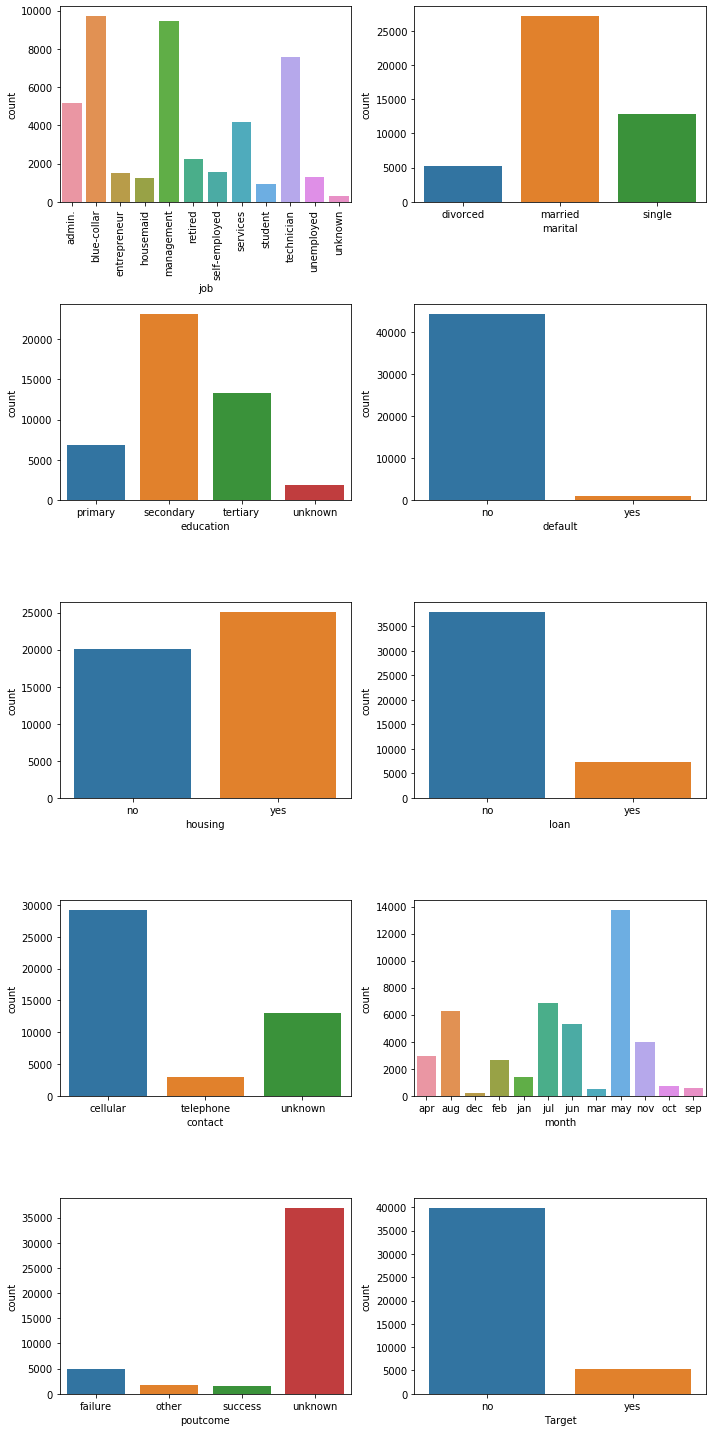

In [35]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 20)) 
axe = axe.flatten() 
pl=sns.countplot(x=df['job'],data=df,ax=axe[0])
plt.setp(pl.get_xticklabels(), rotation = 90)
sns.countplot(x=df['marital'],data=df,ax=axe[1]) #Count plot of 'marital'
sns.countplot(x=df['education'],data=df,ax=axe[2]) #count plot of 'education'
sns.countplot(x=df['default'],data=df,ax=axe[3]) #Count plot of 'default'
sns.countplot(x=df['housing'],data=df,ax=axe[4]) #Count plot of 'housing'
sns.countplot(x=df['loan'],data=df,ax=axe[5]) #Count plot of 'loan'
sns.countplot(x=df['contact'],data=df,ax=axe[6]) #Count plot of 'contact'
sns.countplot(x=df['month'],data=df,ax=axe[7]) #Count plot of 'month'
sns.countplot(x=df['poutcome'],data=df,ax=axe[8]) #Count plot of 'poutcome'
sns.countplot(x=df['Target'],data=df,ax=axe[9]) #Count plot of 'target'
fig.tight_layout() #for arranging the plots
fig.show() #display plots


# Understanding from distributions
* More than 90% customers have no default credit
* Around 88% customers have not subscribed for term deposit
* Most customers have been contacted in may
* Most customers have been contacted by cellular network(mobile phone)
* Number of customers who have housing loan is more than the number of customers who don't have housing loan
* Around 6% customers have credit in default

# Measure of skewness of numerical columns

In [37]:
df.skew().to_frame("skew")

,skew
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


# Checking the presence of outliers

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


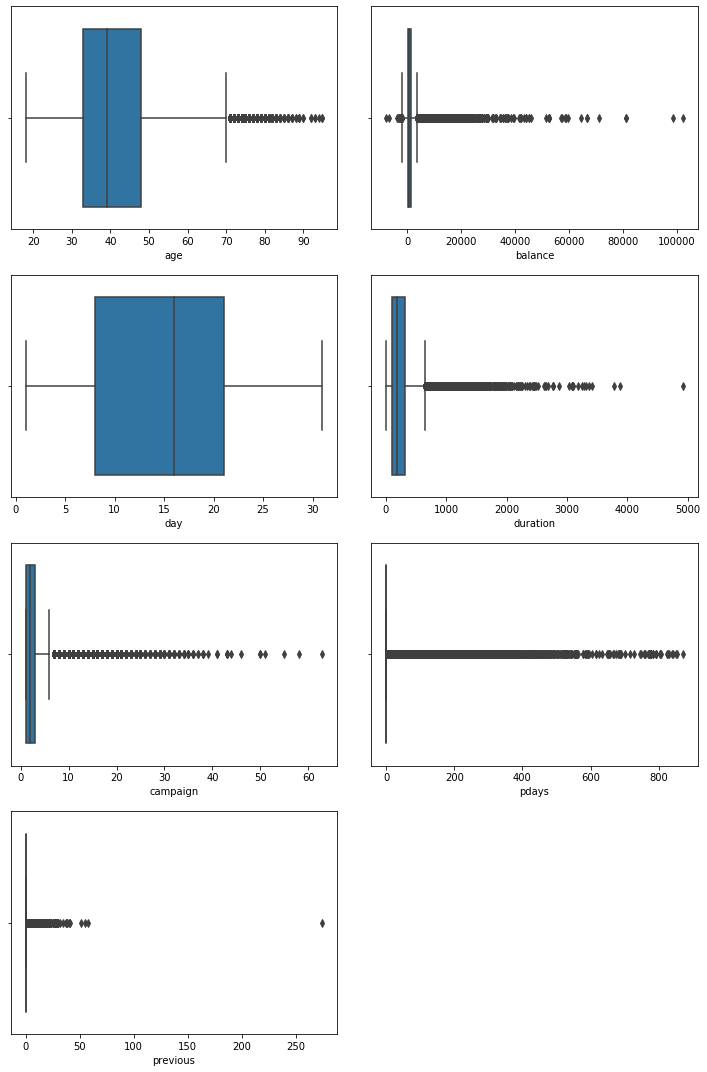

In [40]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() #to flatten subplot index positions
sns.boxplot(df['age'],ax=axe[0]) #boxplot of 'age' to find outliers
sns.boxplot(df['balance'],ax=axe[1]) #box plot of 'balance' to find outliers
sns.boxplot(df['day'],ax=axe[2]) #box plot of 'day' to find outliers
sns.boxplot(df['duration'],ax=axe[3]) #box plot of 'duration'to find outliers
sns.boxplot(df['campaign'],ax=axe[4]) #box plot of 'campaign' to find outliers
sns.boxplot(df['pdays'],ax=axe[5]) #box plot of 'pdays' to find outliers
sns.boxplot(df['previous'],ax=axe[6]) #box plot of 'previous' to find outliers
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

# Understanding from boxplots
* Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
* Values less than 0 are present in 'Balance' column

In [135]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

# Data Preprocessing:
## Label Encoding of variables


In [44]:
df1 = df.copy() #making a copy of dataframe 'df_2'
encoder = LabelEncoder() #creating object of LabelEncoder 
df1['default'] = encoder.fit_transform(df1['default']).astype(int) #encoding 'default' column 
df1['marital'] = encoder.fit_transform(df1['marital']).astype(int) #encoding 'marital' column and assigning 1 married, 2 divorced and 3 single 
df1['loan'] = encoder.fit_transform(df1['loan']).astype(int) #encoding 'loan' column and assigning 0 no and 1 yes values
df1['housing'] = encoder.fit_transform(df1['housing']).astype(int) #encoding 'housing' column and assigning 0 no and 1 yes values
df1['Target'] = encoder.fit_transform(df1['Target']).astype(int) #encoding 'target' column and assigning 0 no and 1 yes values
df1['month'] = encoder.fit_transform(df1['month']).astype(int)#encoding 'month' column and assigning 0-11 values
df1['poutcome'] = encoder.fit_transform(df1['poutcome']).astype(int)#encoding 'month' column and assigning 0-11 values
df1['education'] = encoder.fit_transform(df1['education']).astype(int)#encoding 'month' column and assigning 0-11 values
df1['contact'] = encoder.fit_transform(df1['contact']).astype(int)
df1.head() #displaying head of encoded dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Checking & modifying datatypes after Label Encoding

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
Target       45211 non-null int32
dtypes: category(1), int32(9), int64(7)
memory usage: 4.0 MB


In [46]:
df1[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]= df1[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
#changing datatypes of attributes

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# Handeling Outliers with mean replacement

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


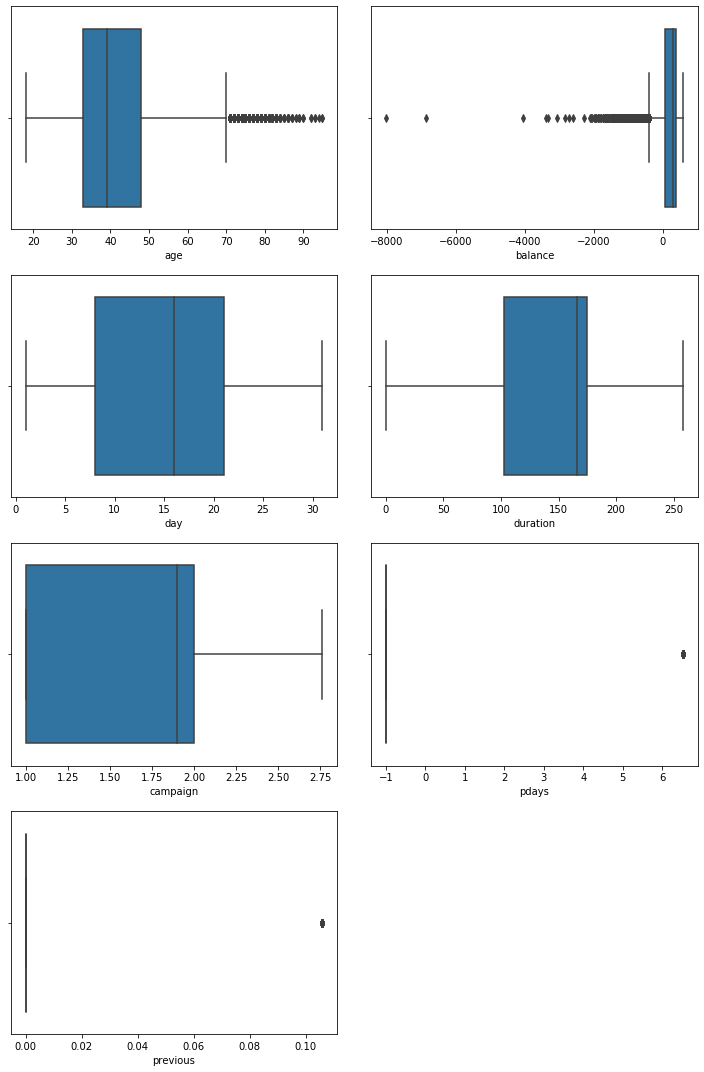

In [58]:
meanbal = float(df1['balance'].mean()) #mean balance
df1['balance'] = np.where(df1['balance'] >np.percentile(df1['balance'], 75), meanbal,df1['balance']) #replacing with mean

meandur = float(df1['duration'].mean()) #mean duration
df1['duration'] = np.where(df1['duration'] >np.percentile(df1['duration'], 75), meandur,df1['duration'])#replacing with mean

meancam = float(df1['campaign'].mean()) #mean campaign
df1['campaign'] = np.where(df1['campaign'] >np.percentile(df1['campaign'], 75), meancam,df1['campaign'])#replacing with mean

meanpd = float(df1['pdays'].mean()) #mean pdays
df1['pdays'] = np.where(df1['pdays'] >np.percentile(df1['pdays'], 75), meanpd,df1['pdays'])#replacing with mean

meanpr = float(df1['previous'].mean()) #mean previous
df1['previous'] = np.where(df1['previous'] >np.percentile(df1['previous'], 75),meanpr ,df1['previous'])#replacing with mean

fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() #to flatten subplot index positions
sns.boxplot(df1['age'],ax=axe[0]) #boxplot of 'age' to find outliers
sns.boxplot(df1['balance'],ax=axe[1]) #box plot of 'balance' to find outliers
sns.boxplot(df1['day'],ax=axe[2]) #box plot of 'day' to find outliers
sns.boxplot(df1['duration'],ax=axe[3]) #box plot of 'duration'to find outliers
sns.boxplot(df1['campaign'],ax=axe[4]) #box plot of 'campaign' to find outliers
sns.boxplot(df1['pdays'],ax=axe[5]) #box plot of 'pdays' to find outliers
sns.boxplot(df1['previous'],ax=axe[6]) #box plot of 'previous' to find outliers
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

# Understanding from boxplots after handeling outliers
* Outliers in 'age' column are not handled because it is a specific value for each record.
* After handeling Outliers in 'balance', the number of outliers on the lower side is increased.

# Finding Correlation

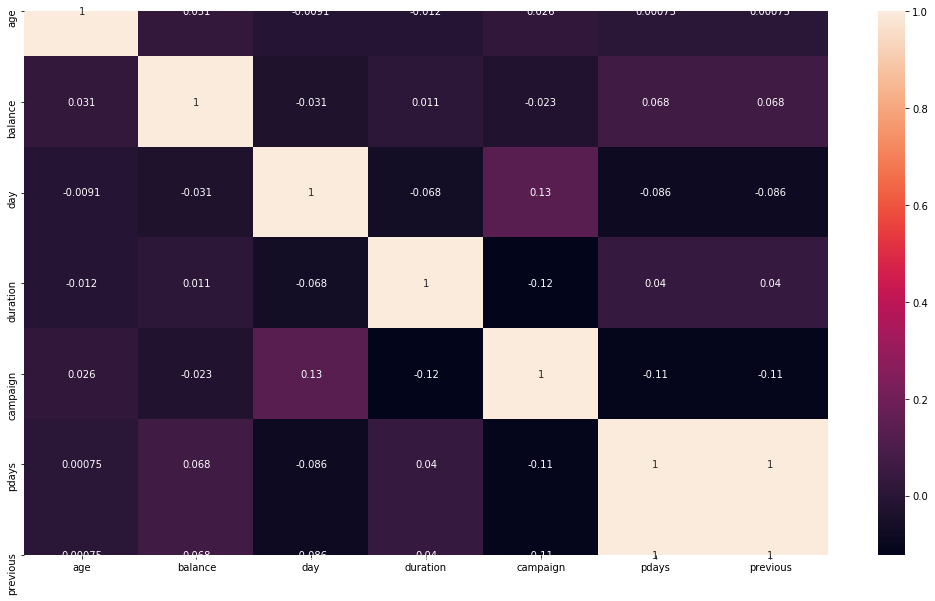

In [61]:
plt.figure(figsize=(18,10)) #for adjusting figuresize
sns.heatmap(df1.corr(),annot=True) #for correlation plot

# Understanding from above corrp plot:
* 'pdays' and 'previous' are highly correlated
# Removing columns:
* 'job','education' and 'contact' attributes contain multiple unknown values.
* As they are specific string values and not numerical so cannot be treated with median, mean replacement
* As per data description, duration attribute is removed to have a realistic prediction.
* 'day' and 'month' of contact will not have any realtionship with customer opting for subscription
* 'pdays' and 'previous' are highly correlated so removing any one from both of them.
* Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models

In [63]:
df1.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact      category
day             int64
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
Target       category
dtype: object

In [64]:
df1 = df1.drop(['job','education','contact','duration','pdays','day','month'],axis=1)

In [65]:
df1.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,284.128281,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,284.128281,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of features

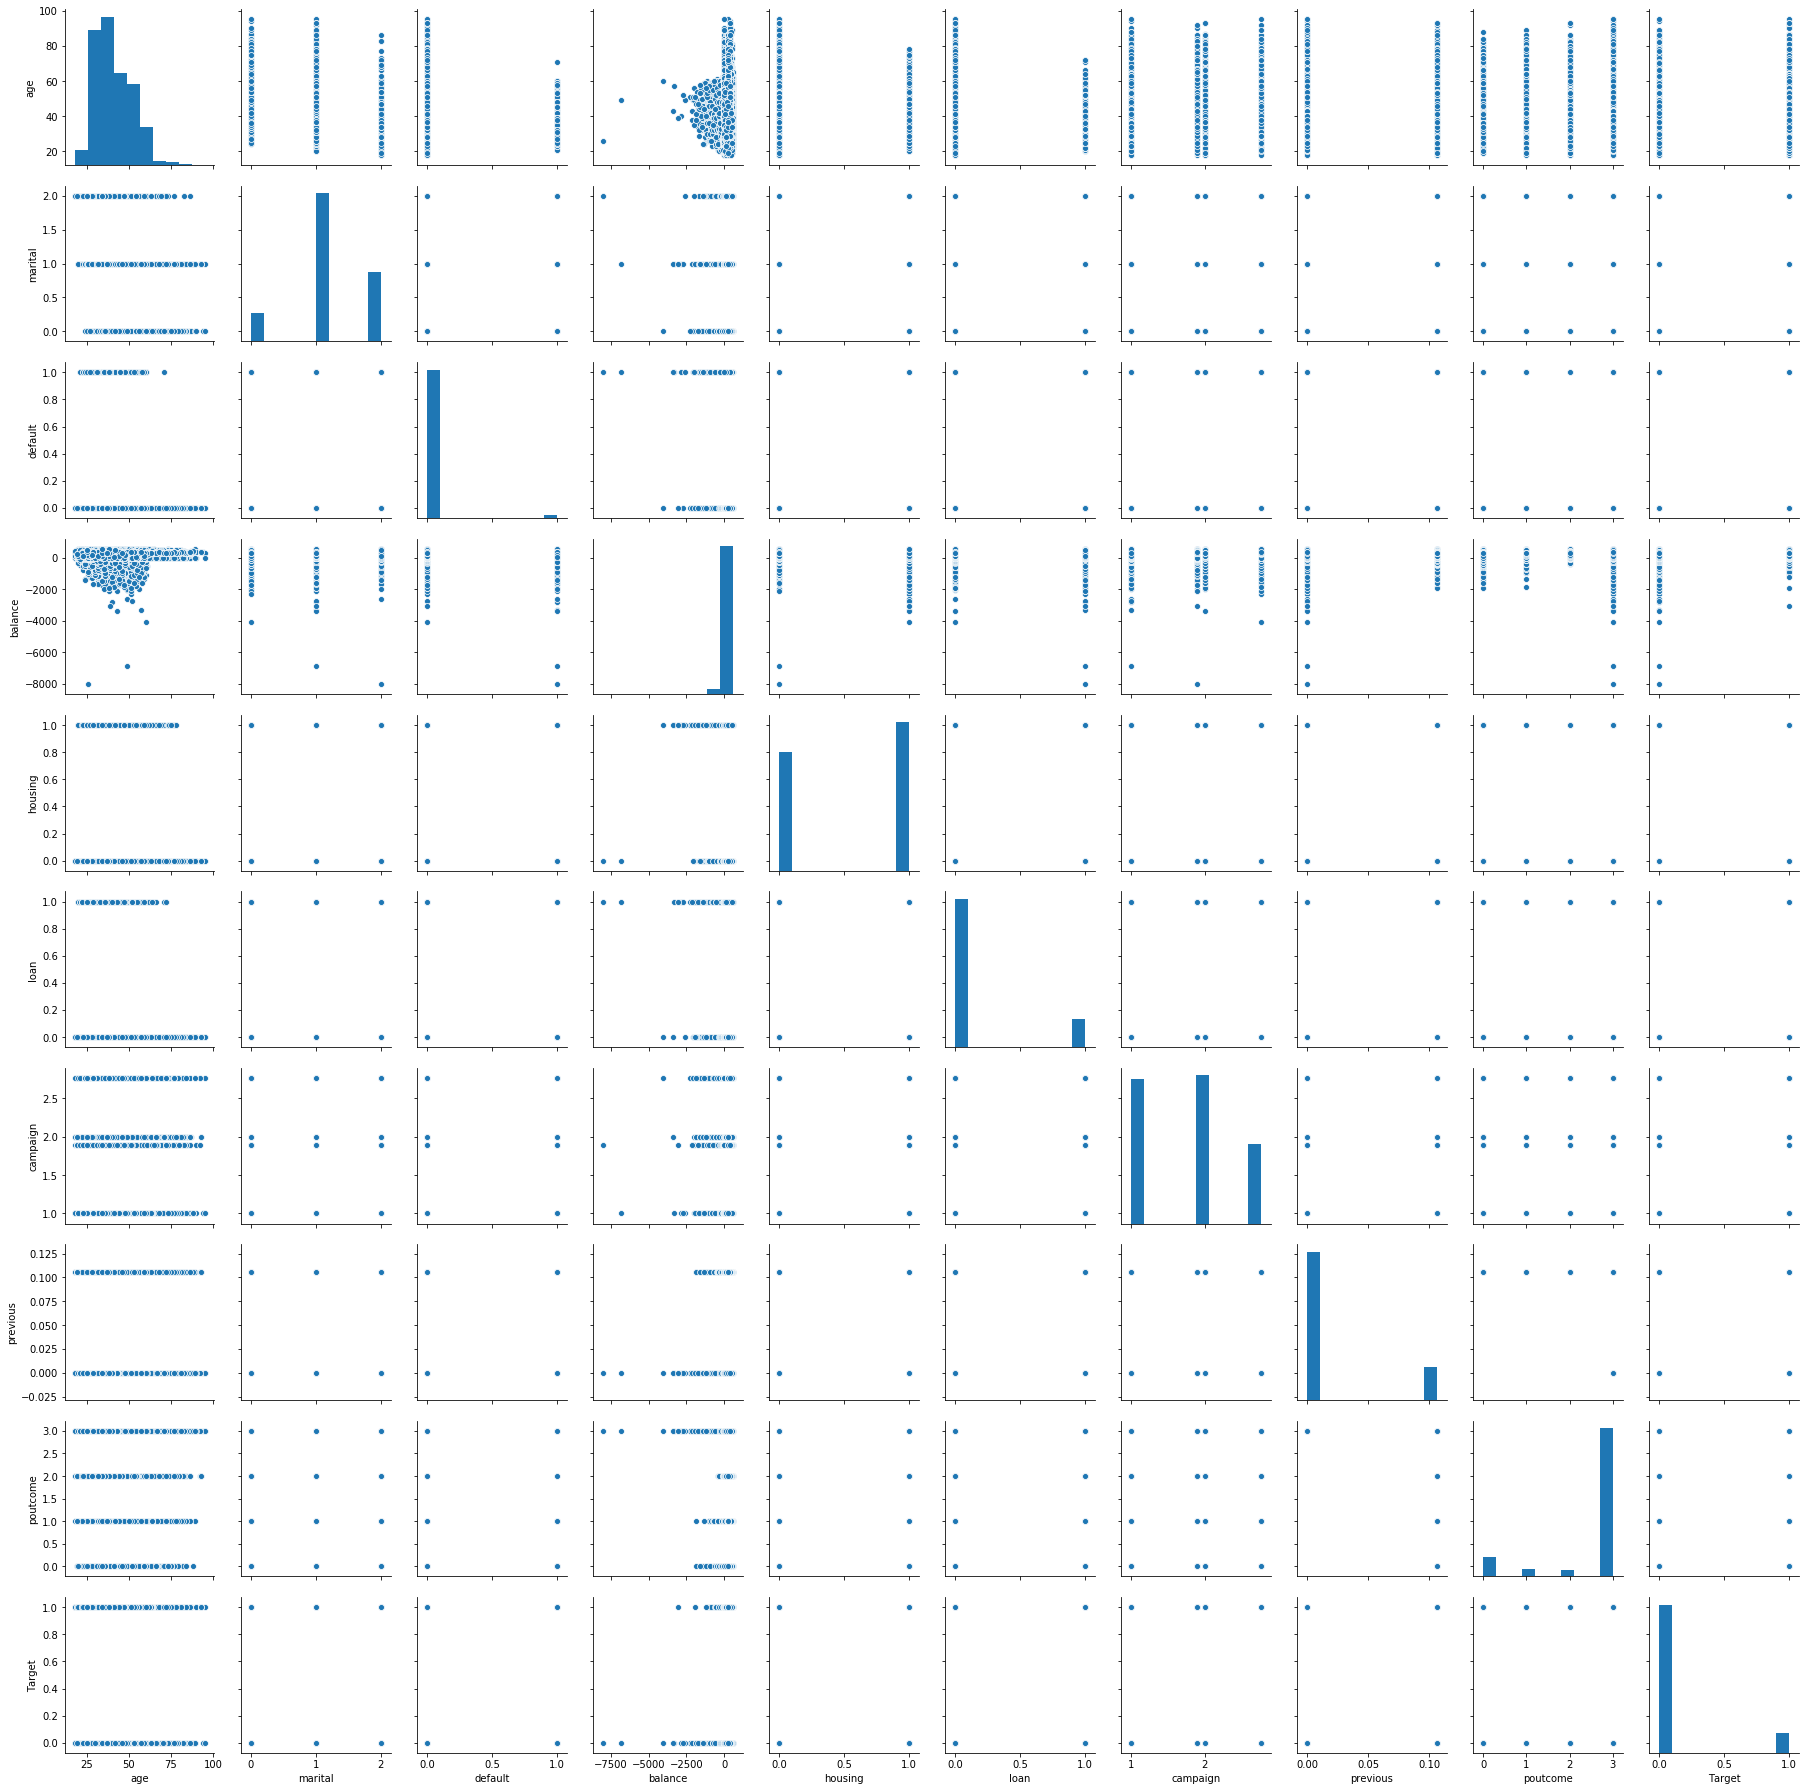

In [66]:
sns.pairplot(df1)

# Test Train Split

In [67]:
X = df1.drop('Target',axis=1) #independent variables  
y = df1['Target'] #dependent variable

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) #train test split in 70:30 ratio

# Scaling columns

In [69]:
scaler = StandardScaler() #using standard scaler method
X_train_scaled = scaler.fit_transform(X_train) #Scaling of Train dataset
X_test_scaled = scaler.fit_transform(X_test) #Scaling of Test dataset

# Models:
## Logistic Regression

In [71]:
logreg  = LogisticRegression()
logreg.fit(X_train_scaled,y_train)
y_pred = logreg.predict(X_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
print("Confusion matrix:" ,confusion_matrix(y_test,y_pred))
LR_Accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score:" ,LR_Accuracy)
print("Classification report" ,classification_report(y_test,y_pred))

Confusion matrix: [[11813   200]
 [ 1286   265]]
Accuracy Score: 0.8904452963727514
Classification report               precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.57      0.17      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



# Naive Bayes

In [75]:
NB = GaussianNB()
NB.fit(X_train_scaled,y_train)
y_predd = NB.predict(X_test_scaled)

In [112]:
print("Confusion matrix:" ,confusion_matrix(y_test,y_predd))
NB_Accuracy = accuracy_score(y_test,y_predd)
print("Accuracy Score:" ,NB_Accuracy)
print("Classification report" ,classification_report(y_test,y_predd))

Confusion matrix: [[10628  1385]
 [ 1014   537]]
Accuracy Score: 0.8231347685048658
Classification report               precision    recall  f1-score   support

           0       0.91      0.88      0.90     12013
           1       0.28      0.35      0.31      1551

    accuracy                           0.82     13564
   macro avg       0.60      0.62      0.60     13564
weighted avg       0.84      0.82      0.83     13564



# K Nearest Neighbor

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
y_predict = knn.predict(X_test_scaled)

In [113]:
print("Confusion matrix:" ,confusion_matrix(y_test,y_predict))
KNN_Accuracy = accuracy_score(y_test,y_predict)
print("Accuracy Score:" ,KNN_Accuracy)
print("Classification report" ,classification_report(y_test,y_predict))

Confusion matrix: [[11399   614]
 [ 1216   335]]
Accuracy Score: 0.8650840460041286
Classification report               precision    recall  f1-score   support

           0       0.90      0.95      0.93     12013
           1       0.35      0.22      0.27      1551

    accuracy                           0.87     13564
   macro avg       0.63      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



optimal k is 13


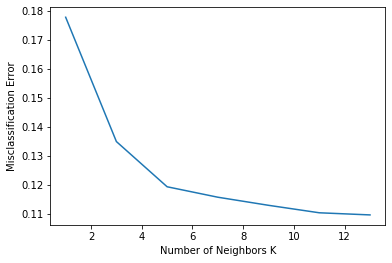

In [79]:
oddList = list(np.arange(1,15)) #Range from 1 to 15
neighbors = list(filter(lambda x: x % 2 != 0, oddList)) #Selecting only odd numbers from Range 1 to 24

accuracy_list = [] #Empty list to store accuracy scores of KNN models based on various K values

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i) #Instantiate KNN with k=i
    knn.fit(X_train_scaled,y_train)  #Call the fit method of KNN to train the model or to learn the parameters of model
    y_pred = knn.predict(X_test_scaled) #Predict 
    accuracy_s = accuracy_score(y_test,y_pred) #for accuracy score
    accuracy_list.append(accuracy_s)  #for appedning accuracy score to accuracy score list
    
MSE=[1 - j for j in accuracy_list] #calculation of Mean Squared Error

optimal = neighbors[MSE.index(min(MSE))] #Optimal K value selected by minimum MSE
print('optimal k is',optimal) #Print optimal K value selected by minimum MSE

plt.plot(neighbors,MSE) #MSE plot 
plt.xlabel('Number of Neighbors K') #XLabel
plt.ylabel('Misclassification Error') #YLabel
plt.show() #display plot

# Support Vector Classification

In [80]:
svc = SVC()  #Instantiate SVC
svc.fit(X_train_scaled,y_train) #Call the fit method of SVC to train the model or to learn the parameters of model
y_predicted = svc.predict(X_test_scaled) #Predict 



In [115]:
print("Confusion matrix:" ,confusion_matrix(y_test,y_predicted))
SVC_Accuracy = accuracy_score(y_test,y_predicted)
print("Accuracy Score:" ,SVC_Accuracy)
print("Classification report" ,classification_report(y_test,y_predicted))

Confusion matrix: [[11866   147]
 [ 1273   278]]
Accuracy Score: 0.8953111176644057
Classification report               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.90      0.87     13564



# Decision Tree Classification

In [84]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict_tree = dt.predict(X_test)

In [117]:
print("Confusion matrix:" ,confusion_matrix(y_test,y_predict_tree))
DT_Accuracy = accuracy_score(y_test,y_predict_tree)
print("Accuracy Score:" ,DT_Accuracy)
print("Classification report" ,classification_report(y_test,y_predict_tree))

Confusion matrix: [[11173   840]
 [ 1223   328]]
Accuracy Score: 0.8479062223532882
Classification report               precision    recall  f1-score   support

           0       0.90      0.93      0.92     12013
           1       0.28      0.21      0.24      1551

    accuracy                           0.85     13564
   macro avg       0.59      0.57      0.58     13564
weighted avg       0.83      0.85      0.84     13564



In [87]:
xvar = df1.drop('Target', axis=1) #variables in x
feature_cols = xvar.columns # columns in x
feat_importance = dt.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dt.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
balance,0.368389
age,0.278439
poutcome,0.109209
campaign,0.096021
marital,0.049573
previous,0.040062
housing,0.026976
loan,0.026867
default,0.004464


# Pruning of Decision Tree

In [88]:
dt_prune = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1) #Instantiate Decision Tree with max_depth
dt_prune.fit(X_train,y_train)
y_predict_tree_prune = dt_prune.predict(X_test)

In [118]:
print("Confusion matrix:" ,confusion_matrix(y_test,y_predict_tree))
DTPRUNE_Accuracy = accuracy_score(y_test,y_predict_tree)
print("Accuracy Score:" ,DTPRUNE_Accuracy)
print("Classification report" ,classification_report(y_test,y_predict_tree_prune))

Confusion matrix: [[11173   840]
 [ 1223   328]]
Accuracy Score: 0.8479062223532882
Classification report               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



In [133]:
feat_importance = dt_prune.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dt_prune.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
poutcome,0.547320
previous,0.215141
age,0.142976
housing,0.087515
marital,0.007048
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000


# Random Forest - Ensemble

In [108]:
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)#Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train) #Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) #Predict

In [120]:
print("Confusion matrix:" ,confusion_matrix(y_test,predicted_RAN))
RF_Accuracy = accuracy_score(y_test,predicted_RAN)
print("Accuracy Score:" ,RF_Accuracy)
print("Classification report" ,classification_report(y_test,predicted_RAN))

Confusion matrix: [[11588   425]
 [ 1229   322]]
Accuracy Score: 0.8780595694485402
Classification report               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.43      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Bagging

In [102]:
bc = BaggingClassifier(base_estimator=dt_prune, n_estimators=500,random_state=1) #Instantiate Bagging Classifier
bc = bc.fit(X_train, y_train) #Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bc.predict(X_test) #Predict

In [121]:
print("Confusion matrix:" ,confusion_matrix(y_test,predicted_BAG))
BAG_Accuracy = accuracy_score(y_test,predicted_BAG)
print("Accuracy Score:" ,BAG_Accuracy)
print("Classification report" ,classification_report(y_test,predicted_BAG))

Confusion matrix: [[11848   165]
 [ 1253   298]]
Accuracy Score: 0.8954585667944559
Classification report               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.64      0.19      0.30      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



# Boosting
## Adaptive boosting

In [104]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train) #Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) #Predict

In [123]:
print("Confusion matrix:" ,confusion_matrix(y_test,predicted_ADA))
ADA_Accuracy = accuracy_score(y_test,predicted_ADA)
print("Accuracy Score:" ,ADA_Accuracy)
print("Classification report" ,classification_report(y_test,predicted_ADA))

Confusion matrix: [[11888   125]
 [ 1308   243]]
Accuracy Score: 0.8943526983190799
Classification report               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# Gradient Boosting

In [106]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) #Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)#Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) #Predict


In [124]:
print("Confusion matrix:" ,confusion_matrix(y_test,predicted_GRAD))
GRAD_Accuracy = accuracy_score(y_test,predicted_GRAD)
print("Accuracy Score:" ,GRAD_Accuracy)
print("Classification report" ,classification_report(y_test,predicted_GRAD))

Confusion matrix: [[11887   126]
 [ 1301   250]]
Accuracy Score: 0.8947950457092303
Classification report               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.60     13564
weighted avg       0.87      0.89      0.87     13564



# Models with accuracy scores

In [126]:
Scores = [('Naive bayes', NB_Accuracy),
      ('KNN', KNN_Accuracy),
      ('Logistic Regression', LR_Accuracy),
      ('SVC', SVC_Accuracy ),
      ('Decision Tree',DT_Accuracy),
      ('Decision Tree with Regularization',DTPRUNE_Accuracy),
      ('Bagging',BAG_Accuracy),
      ('Adaptive Boosting',ADA_Accuracy),
      ('Gradient Boosting',GRAD_Accuracy),
      ('Random Forest N=100',RF_Accuracy),
      ('Random Forest N=500',RF_Accuracy)] #List of accuracy scores of all models

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) #Conversion of list to dataframe

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False) #Sort values in descending manner

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
6,Bagging,0.895459
3,SVC,0.895311
8,Gradient Boosting,0.894795
7,Adaptive Boosting,0.894353
2,Logistic Regression,0.890445
9,Random Forest N=100,0.878060
10,Random Forest N=500,0.878060
1,KNN,0.865084
4,Decision Tree,0.847906
5,Decision Tree with Regularization,0.847906


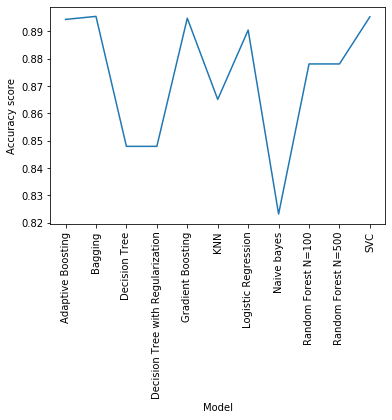

In [127]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()